In [5]:
import pandas as pd
import numpy as np

import time
import os
import sys

from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord

In [ ]:
from astroquery.ned import Ned

# ztfquery

In [4]:
from ztfquery import lightcurve

[ztf_api](https://irsa.ipac.caltech.edu/docs/program_interface/ztf_lightcurve_api.html)

In [71]:
!echo $ZTFDATA

/Volumes/ExtremeSSD/ZTFdata/


In [17]:
table_=Ned.query_object('Mrk 1018')

In [18]:
table_

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,UGC 01597,31.56662,-0.29144,G,12878.0,0.042957,SPEC,14.2g,--,269,1,138,46,42,13,0


In [35]:
os.mkdir('/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF/')

In [37]:
CLAGN_Candidate_BAT_ZTF_dir='/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF'

In [62]:
CLAGN_Candidate_BAT_ZTF_dir_1='/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF_catflags=0/'

In [13]:
CLAGN_Candidate_BAT=pd.read_excel('/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/BAT_CLAGN_CANDIDATE.xlsx',
                                 )#dtype={'P-value':float}

In [19]:
for index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    result_table = Ned.query_object(name)
    CLAGN_Candidate_BAT.loc[index,'ra']=result_table['RA'].data[0]
    CLAGN_Candidate_BAT.loc[index,'dec']=result_table['DEC'].data[0]

In [20]:
CLAGN_Candidate_BAT.columns

Index(['AGN', 'Type', 'Redshift', 'Luminosity', 'P-value', 'ra', 'dec'], dtype='object')

In [21]:
CLAGN_Candidate_BAT.head()

,AGN,Type,Redshift,Luminosity,P-value,ra,dec
0,NGC 526A,Sy 2.0,0.0191,43.78,0.0,20.97664,-35.06553
1,NGC 5548,Sy 1.5,0.0172,43.76,0.0,214.49806,25.13679
2,NGC 4151,Sy 1.5,0.0033,43.17,0.0,182.63574,39.40573
3,NGC 973,Sy 2.0,0.0162,43.46,0.0,38.58379,32.50561
4,WKK 4374,Sy 1.9,0.0180,43.27,0.000001,222.88805,-55.67733


curl -X POST ztf.alerce.online/get_detections -d @- << EOF
{
   "oid":"ZTF18aaaadvs"
}
EOF

In [ ]:
182.63574 39.40573

In [3]:
3.0/3600,1/3600

(0.0008333333333333334, 0.0002777777777777778)

# ZTF

## NGC 4151

In [23]:
Name_index=2
print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec']

NGC 4151


(182.63574, 39.40573)

NGC 4151
182.63574 39.40573


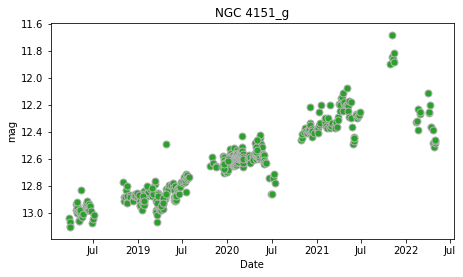

In [67]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
save_name=name.strip().replace(' ','_')


print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
print(CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'])

band='g'


data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                  CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                          bandname=band,BAD_CATFLAGS_MASK=32768)
ztflc_show_in_jupyter(data_g,name,band)

#lc_g = lightcurve.LCQuery(data_g)

#lc_g.show()

In [75]:
oids=[]
for oid in data_g['oid']:
    if oid not in oids:
        oids.append(oid)

In [76]:
oids

[715107400005470, 1713113300001769]

In [74]:
data_g[data_g['oid']=='715207400001942']

,oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,...,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid


NGC 4151
182.63574 39.40573


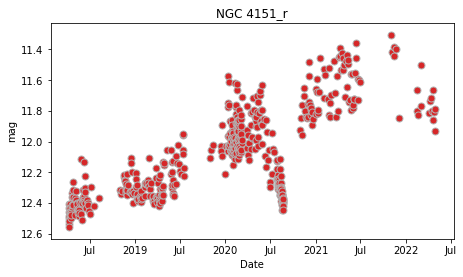

In [68]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
save_name=name.strip().replace(' ','_')


print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
print(CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'])

band='r'


data_r = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                  CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                          bandname=band,BAD_CATFLAGS_MASK=32768)
ztflc_show_in_jupyter(data_r,name,band)

#lc_g = lightcurve.LCQuery(data_g)
#lc_g.show()

NGC 4151
182.63574 39.40573


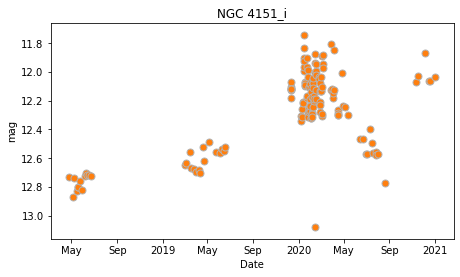

In [69]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
save_name=name.strip().replace(' ','_')


print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
print(CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'])

band='i'


data_i = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                  CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                          bandname=band,BAD_CATFLAGS_MASK=32768)
ztflc_show_in_jupyter(data_i,name,band)

#lc_g = lightcurve.LCQuery(data_g)
#lc_g.show()

In [38]:
ztf_bands=['g','i','r']

In [40]:
for Name_index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    save_name=name.strip().replace(' ','_')
    
    for band in ztf_bands:
        if not os.path.exists('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)):
            data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                                  bandname=band,BAD_CATFLAGS_MASK=32768)
            data_g.to_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band),index=False) 
            time.sleep(1+np.random.randint(2,5))  
        else:
            time.sleep(1)
    

In [42]:
len(CLAGN_Candidate_BAT)

26

In [43]:
26*3

78

In [49]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
print(name)
save_name=name.strip().replace(' ','_')
band=ztf_bands[0]
data=pd.read_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)) 
#

NGC 4151


In [61]:
for Name_index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    save_name=name.strip().replace(' ','_')    
    for band in ztf_bands:
        if os.path.exists('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)):
            data=pd.read_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)) 
            ztflc_show(data,name,band)

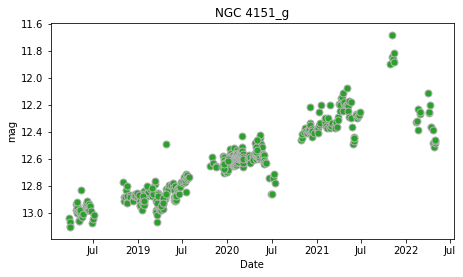

In [56]:
ztflc_show(data,name,band)

In [47]:
data.columns

Index(['oid', 'expid', 'hjd', 'mjd', 'mag', 'magerr', 'catflags', 'filtercode',
       'ra', 'dec', 'chi', 'sharp', 'filefracday', 'field', 'ccdid', 'qid',
       'limitmag', 'magzp', 'magzprms', 'clrcoeff', 'clrcounc', 'exptime',
       'airmass', 'programid'],
      dtype='object')

In [66]:
def ztflc_show_in_jupyter(data,name,band, showtoday=False, show_upperlimits=False, formattime=True,
             marker="o", mec="0.7", ms=7, ecolor="0.7", ls="None", zorder=4, **kwargs):
        """ kwargs goes to matplotlib's errorbar() """
        FILTER_COLORS = ["C2","C3","C1"]
        FILTER_CODE   = ["zg","zr","zi"]
        save_name=name.strip().replace(' ','_')
        

        from astropy import time
        import matplotlib.pyplot as mpl

        # ----------- #
        # Global      #
        # ----------- #
        lc_dataframe = data
        prop = dict(marker=marker, mec=mec, ms=ms, ecolor=ecolor, ls=ls, zorder=zorder)

        # ----------- #
        #
        # ----------- #
        fig = mpl.figure(figsize=[7,4])
        ax = fig.add_axes([0.1,0.15,0.8,0.75])
        for filter_ in np.unique(lc_dataframe["filtercode"]):
            d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
            if filter_ in FILTER_CODE:
                prop["color"] = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
            else:
                prop["color"] = "0.7"

            if formattime:
                dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
            else:
                dates = d["mjd"]
            ax.errorbar(dates, d["mag"], 
                                yerr=d["magerr"],
                                **{**prop,**kwargs})

        ax.invert_yaxis()
        
        if show_upperlimits:
            for filter_ in np.unique(lc_dataframe["filtercode"]):
                d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
                if filter_ in FILTER_CODE:
                    color = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
                else:
                    color = "0.7"

                if formattime:
                    dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
                else:
                    dates = d["mjd"]
                    
                ax.errorbar(dates, d["limitmag"], 
                            yerr=0.1, lolims=True,marker="None", ls="None", 
                            color=color, alpha=0.1,
                            )

        if showtoday:
            today_color = "0.7"
            import datetime
            today = time.Time(datetime.date.today().isoformat(),format="iso").mjd
            ax.axvline(today, ls="--", color=today_color, zorder=1, lw=1)
            ax.text(today, ax.get_ylim()[0]-0.05, "Today", va="bottom", ha="right", rotation=90, color=today_color)

        if formattime:
            from matplotlib import dates as mdates            
            locator = mdates.AutoDateLocator()
            formatter = mdates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel("Date")
        else:
            ax.set_xlabel("MJD")
        # - Labels

        ax.set_ylabel("mag")
        ax.set_title('%s_%s'%(name,band))
        
        
        

In [60]:
def ztflc_show(data,name,band, showtoday=False, show_upperlimits=False, formattime=True,
             marker="o", mec="0.7", ms=7, ecolor="0.7", ls="None", zorder=4, **kwargs):
        """ kwargs goes to matplotlib's errorbar() """
        FILTER_COLORS = ["C2","C3","C1"]
        FILTER_CODE   = ["zg","zr","zi"]
        save_name=name.strip().replace(' ','_')
        

        from astropy import time
        import matplotlib.pyplot as mpl

        # ----------- #
        # Global      #
        # ----------- #
        lc_dataframe = data
        prop = dict(marker=marker, mec=mec, ms=ms, ecolor=ecolor, ls=ls, zorder=zorder)

        # ----------- #
        #
        # ----------- #
        fig = mpl.figure(figsize=[7,4])
        ax = fig.add_axes([0.1,0.15,0.8,0.75])
        for filter_ in np.unique(lc_dataframe["filtercode"]):
            d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
            if filter_ in FILTER_CODE:
                prop["color"] = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
            else:
                prop["color"] = "0.7"

            if formattime:
                dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
            else:
                dates = d["mjd"]
            ax.errorbar(dates, d["mag"], 
                                yerr=d["magerr"],
                                **{**prop,**kwargs})

        ax.invert_yaxis()
        
        if show_upperlimits:
            for filter_ in np.unique(lc_dataframe["filtercode"]):
                d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
                if filter_ in FILTER_CODE:
                    color = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
                else:
                    color = "0.7"

                if formattime:
                    dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
                else:
                    dates = d["mjd"]
                    
                ax.errorbar(dates, d["limitmag"], 
                            yerr=0.1, lolims=True,marker="None", ls="None", 
                            color=color, alpha=0.1,
                            )

        if showtoday:
            today_color = "0.7"
            import datetime
            today = time.Time(datetime.date.today().isoformat(),format="iso").mjd
            ax.axvline(today, ls="--", color=today_color, zorder=1, lw=1)
            ax.text(today, ax.get_ylim()[0]-0.05, "Today", va="bottom", ha="right", rotation=90, color=today_color)

        if formattime:
            from matplotlib import dates as mdates            
            locator = mdates.AutoDateLocator()
            formatter = mdates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel("Date")
        else:
            ax.set_xlabel("MJD")
        # - Labels

        ax.set_ylabel("mag")
        ax.set_title('%s_%s'%(name,band))
        
        fig.savefig('%s/%s_%s.png'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band),
                   dpi=400, transparent=False, bbox_inches='tight')
        mpl.close()
        
        

In [29]:
lc_g.#.data

In [ ]:
data_i = lightcurve.LCQuery.download_data(circle=[299.412,50.55500,0.0014], bandname="i",BAD_CATFLAGS_MASK=15)

In [ ]:
data_r_3arcsec= lightcurve.LCQuery.download_data(circle=[299.412,50.55500,3.0/3600], bandname="r",BAD_CATFLAGS_MASK=15)
print(len(data_r_3arcsec))

In [63]:
CLAGN_Candidate_BAT_ZTF_dir_1

'/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF_catflags=0/'

In [64]:
for Name_index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    save_name=name.strip().replace(' ','_')
    
    for band in ztf_bands:
        if not os.path.exists('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_1,save_name,band)):
            data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                              CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                                  bandname=band,BAD_CATFLAGS_MASK=0)
            data_g.to_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_1,save_name,band),index=False) 
            time.sleep(1+np.random.randint(2,5))  
        else:
            time.sleep(1)
    